In [3]:
import numpy as np
from scipy import stats

In [4]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
from scipy import linalg

arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [8]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [10]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)
spec

array([14.88982544,  0.45294236,  0.29654967])

In [11]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

In [12]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)

In [37]:
from scipy import fftpack
import pylab as pl
import pylab as plt
from matplotlib.colors import LogNorm
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.integrate import odeint
from scipy import signal
from scipy import ndimage
from scipy import misc

In [14]:
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

In [16]:

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

[]

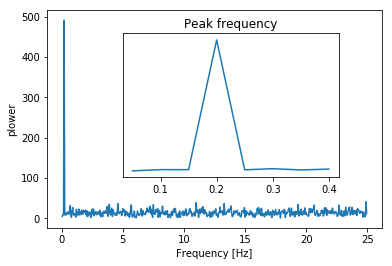

In [21]:
pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])

In [22]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

In [23]:
sig_fft[np.abs(sample_freq) > freq] = 0

In [24]:
main_sig = fftpack.ifft(sig_fft)

C:\Anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

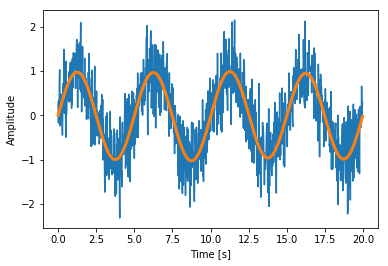

In [26]:
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


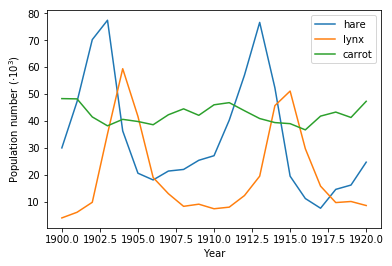

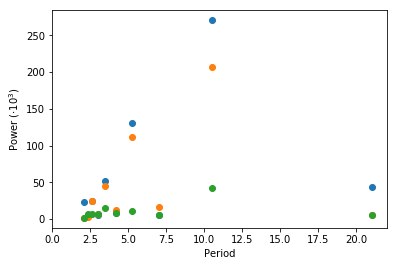

In [27]:
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

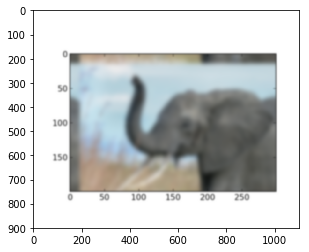

In [28]:
# read image
img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/plot_directive/intro/solutions/image_blur.hires.png")
t = np.linspace(-10, 10, 30)                           # prepare an 1-D Gaussian convolution kernel
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump)                                 # normalize the integral to 1
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]     # make a 2-D kernel out of it

                                                       # padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))


img_ft = fftpack.fft2(img, axes=(0, 1))                # convolve
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real
img2 = np.clip(img2, 0, 1)                             # clip values to range

plt.imshow(img2)                                       # plot output
plt.show()

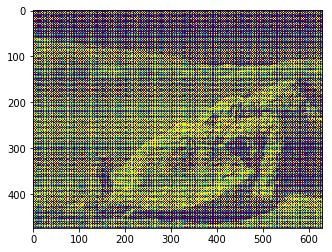

In [29]:
#Exercise: Denoise moon landing image
img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
plt.imshow(img)
plt.show()

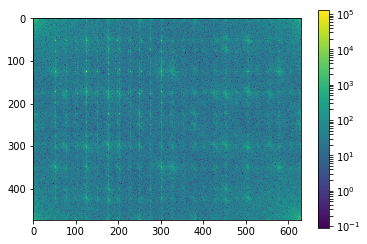

In [34]:
plt.figure()
img_ft = fftpack.fft2(img)
plt.imshow(np.abs(img_ft), norm = LogNorm())
plt.colorbar()
plt.show()

In [41]:
def f(x):
     return x**2 + 10*np.sin(x)

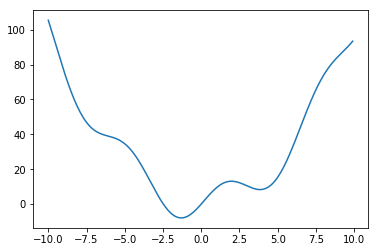

In [42]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show() 

In [43]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

In [44]:
optimize.fmin_bfgs(f, 3, disp=0)

array([3.83746709])

In [45]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

In [46]:
xmin_local = optimize.fminbound(f, 0, 10)    
xmin_local

3.8374671194983834

In [47]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([0.])

In [48]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

In [49]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

In [50]:
def f2(x, a, b):
     return a*x**2 + b*np.sin(x)

In [51]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 1.00376347, 10.32832234])

Text(0,0.5,'f(x)')

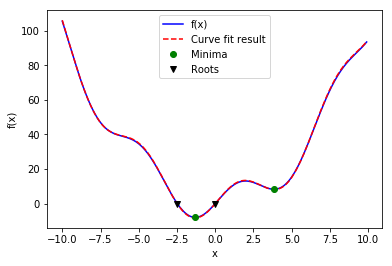

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

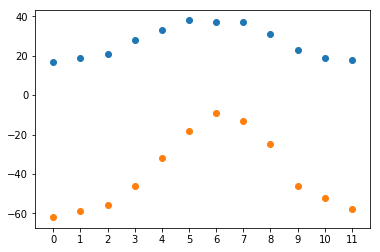

In [53]:

temp_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
temp_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = np.arange(12)

plt.scatter(months, temp_max)
plt.scatter(months, temp_min)
plt.xticks(np.arange(0,12,1))

plt.show()

In [54]:
def func(t, start, range_, t_max):
    return start + range_ * np.cos((t+t_max)*np.pi/6)

In [55]:
from mpl_toolkits.mplot3d import Axes3D

In [80]:
from mpl_toolkits.mplot3d import Axes3D
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

Text(0.5,0.92,'Six-hump Camelback function')

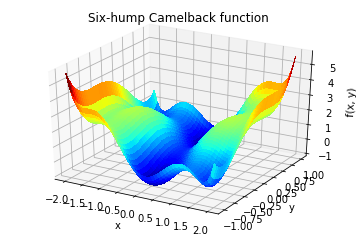

In [81]:
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

                                       #plt.figure()  # simple visualization for use in tutorial
                                       #plt.imshow(sixhump([xg, yg]))
                                       #plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

In [58]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [59]:
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [60]:
from scipy import stats

In [61]:
b = stats.norm.pdf(bins)  # norm is a distribution

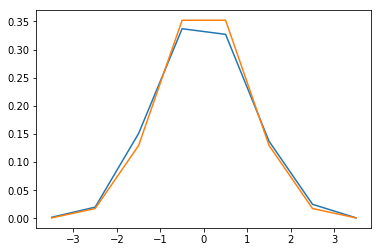

In [62]:
pl.plot(bins, histogram)
pl.plot(bins, b)

In [63]:
loc, std = stats.norm.fit(a)
loc 

-0.012413690017253383

In [64]:
std

1.0175365624401331

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


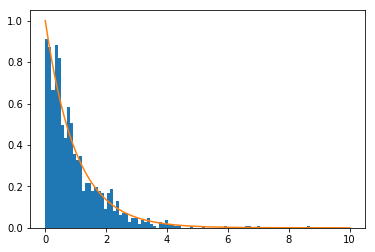

In [65]:
#Exercise: Probability distributions

sample = np.random.gamma(1, 1, 1000)
b = np.linspace(0, 10, 100)
pdf = stats.gamma.pdf(b, 1)

pl.hist(sample, bins = b, normed = True)
pl.plot(b, pdf)

pl.show()

In [66]:
np.median(a) 

-0.03142473949874202

In [67]:
stats.scoreatpercentile(a, 50)

-0.03142473949874202

In [68]:
stats.scoreatpercentile(a, 90)

1.2933010229411348

In [69]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b) 

Ttest_indResult(statistic=-3.110239597941703, pvalue=0.0023910854651474625)

In [70]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [79]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [77]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

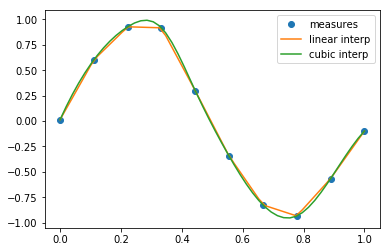

In [83]:
pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')

pl.legend()

In [84]:
from scipy.integrate import quad

In [85]:
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

True

In [101]:
np.allclose(err, 1 - res)

True

In [102]:
def calc_derivative(ypos, time, counter_arr):
     counter_arr += 1
     return -2 * ypos

In [103]:
counter = np.zeros((1,), dtype=np.uint16)

In [104]:
from scipy.integrate import odeint

In [105]:
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec, 
                    args=(counter,), full_output=True)

In [106]:
counter

array([129], dtype=uint16)

In [107]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

Text(0,0.5,'y position [m]')

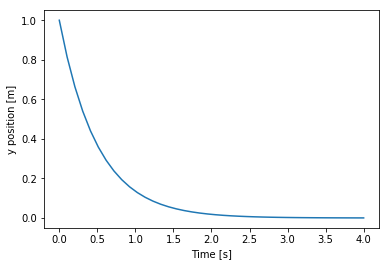

In [108]:
pl.plot(time_vec, yvec)
pl.xlabel('Time [s]')
pl.ylabel('y position [m]')

In [109]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

In [110]:
nu_coef = cviscous / mass
om_coef = kspring / mass

In [111]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])
time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

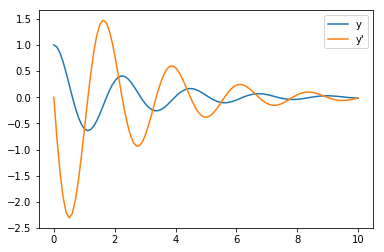

In [112]:
pl.plot(time_vec, yarr[:, 0], label='y')
pl.plot(time_vec, yarr[:, 1], label="y'")

pl.legend()

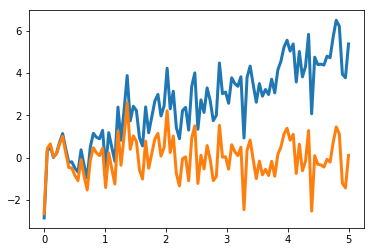

In [113]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

pl.plot(t, x, linewidth=3)
pl.plot(t, signal.detrend(x), linewidth=3)

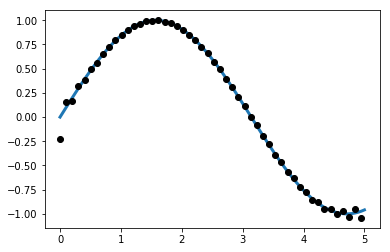

In [114]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

pl.plot(t, x, linewidth=3)
pl.plot(t[::2], signal.resample(x, 50), 'ko')

In [115]:
#lena = misc.lena()
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')

shifted_lena = ndimage.shift(lena, (50, 50))
shifted_lena2 = ndimage.shift(lena, (50, 50), mode='nearest')
rotated_lena = ndimage.rotate(lena, 30)
cropped_lena = lena[50:-50, 50:-50]
zoomed_lena = ndimage.zoom(lena, 2)
zoomed_lena.shape

(1024, 1024)

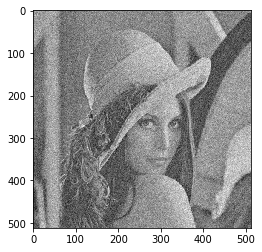

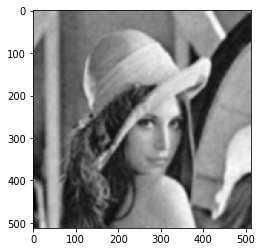

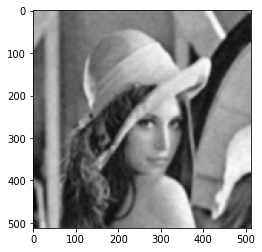

In [116]:
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
plt.imshow(noisy_lena,plt.cm.gray)
plt.show()

blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
plt.imshow(blurred_lena,plt.cm.gray)
plt.show()

median_lena = ndimage.median_filter(blurred_lena, size=5)
plt.imshow(median_lena,plt.cm.gray)
plt.show()

In [134]:
from scipy import signal

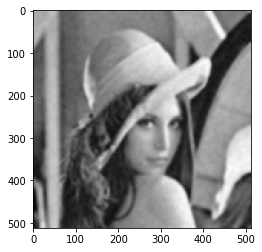

In [117]:
wiener_lena = signal.wiener(blurred_lena, (5,5))
plt.imshow(wiener_lena,plt.cm.gray)
plt.show()

In [118]:
el = ndimage.generate_binary_structure(2, 1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [119]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [120]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [121]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [122]:
#Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [123]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [124]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [125]:
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [126]:
ndimage.binary_opening(a, structure=np.ones((3,3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [127]:
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [128]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

In [129]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 1:6] = 3
a[4,4] = 2; a[2,3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [130]:
ndimage.grey_erosion(a, size=(3,3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [136]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask = sig > 1

In [132]:
labels, nb = ndimage.label(mask)
nb

8

In [138]:
ndimage.find_objects(labels==4)

[(slice(30, 48, None), slice(30, 48, None))]

In [139]:
sl = ndimage.find_objects(labels==4)

In [140]:
import pylab as pl

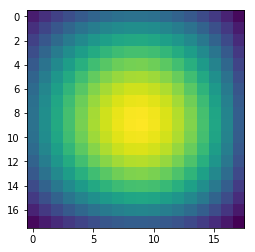

In [141]:
pl.imshow(sig[sl[0]])